<h1><center>Final Data Science Project.</center></h1>

<h3><center>USIT5609 MScIT Part II</center></h3>
<h2><center><b>Uber Price Prediction</b></center></h2>



Team Members:
1) Dhanashree Vartak
1) Neil Mascarenhas

#### Date: 30 June 2021

# Importing Libraries

### Basics and required.

In [1]:
display("Importing libraries for data manipulation and visualization")
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rcParams
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
# Enable inline plotting so that charts appear within the notebook
%matplotlib inline
# Notify user that essential libraries are ready for use
print("Data manipulation and visualization libraries imported successfully.")


'Importing libraries for data manipulation and visualization'

Data manipulation and visualization libraries imported successfully.


### Required for modeling

In [2]:
# Importing libraries for machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet

####

# Importing classifiers for supervised learning tasks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




## For model selection and cross validation.
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics

### Used for encoding and feature engineering.
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Importing ensemble methods for boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

In [3]:
# figure size in inches for Seaborn
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

import warnings
warnings.filterwarnings("ignore")  #### Hides warning messages to get cleaner outputs.
sns.set_theme(style = 'whitegrid')


# Import Datasets

In [4]:
# Load the Uber rides dataset into a DataFrame
uber_data = pd.read_csv('Data\\cab_rides.csv')

# Load the weather dataset into a DataFrame for merging later
weather_data = pd.read_csv('Data\\weather.csv')

In [5]:
uber_data.head() #### To  check if the dataset is imported or not.

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [6]:
weather_data.head() #### To  check if the dataset is imported or not.

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Transformation of Data

In [7]:
# Display summary of the uber_data DataFrame:
# shows each column’s data type and count of non-null entries
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [8]:
# Check the size of the uber_data DataFrame: returns a tuple (number_of_rows, number_of_columns)
# This helps us quickly understand how many records and features we have before further analysis
uber_data.shape

(693071, 10)

In [9]:
# Count the number of missing values in each column of the Uber dataset
uber_data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [10]:
# Display summary of the weather_data DataFrame, showing each column’s data type and count of non-null entries
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [11]:
# Display the number of rows and columns in the weather_data DataFrame
weather_data.shape

(6276, 8)

In [12]:
# Count the number of missing values in each column of the weather_data DataFrame
weather_data.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [13]:
# Remove rows where 'price' is missing from the dataset
uber_data.dropna(subset=['price'], inplace=True)

# Show the count of remaining missing values in each column
uber_data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

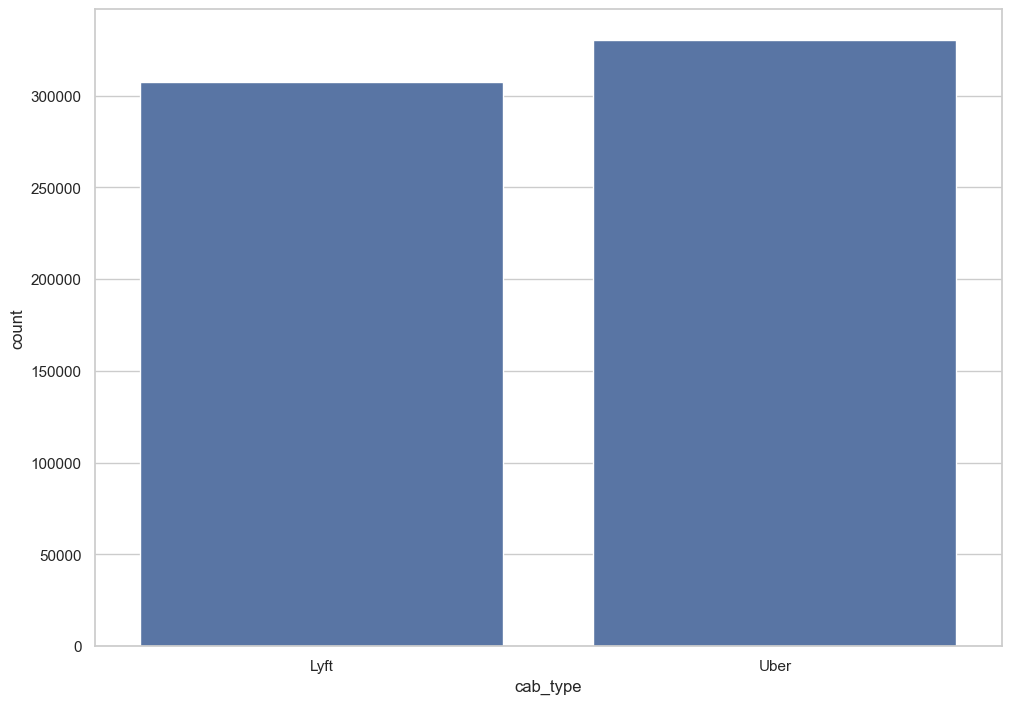

In [14]:
# Count the number of unique values in the 'cab_type' column
ax = sns.countplot(data=uber_data, x='cab_type')

Our analysis and prediction is on Uber Cars only therefore we select only uber and drop rest. 


In [15]:
# Keep only the rows where the cab_type is 'Uber'
uber_data = uber_data.loc[uber_data['cab_type'] == 'Uber']


We drop rain collumn as there was no rain entire year. therefore it has missing values. We remove it as to avoid errors in prediction. 


In [16]:
# Remove the 'rain' column from weather_data since it contains no data (all values are missing)
weather_data = weather_data.drop('rain', axis=1)

Convering timeStamp to Date time format for better analysis and modeling.


In [17]:
from datetime import datetime, date  # import datetime and date classes for handling time data
uber_data['datetime'] = pd.to_datetime(uber_data['time_stamp'], unit='ms', infer_datetime_format=True)  # convert Uber timestamps (ms) into datetime objects
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'], unit='s', infer_datetime_format=True)  # convert weather timestamps (s) into datetime objects


In [18]:
# Extract only the date part from the `datetime` column and store it in a new `Udate` column
uber_data['Udate'] = uber_data.datetime.dt.date

In [19]:
# Extract only the date part from the converted datetime column and store it in a new 'Wdate' column
weather_data['Wdate'] = weather_data.date_time.dt.date

In [20]:
# Provides descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max) for all numeric columns in uber_data
display("Displaying descriptive statistics for uber_data:")
uber_data.describe()
uber_data.loc[0:50,]

'Displaying descriptive statistics for uber_data:'

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,Udate
12,1.11,Uber,1543615981179,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-30 22:13:01.179,2018-11-30
13,1.11,Uber,1544698211014,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-13 10:50:11.014,2018-12-13
14,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13 19:15:03.935,2018-12-13
15,1.11,Uber,1545004511430,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-16 23:55:11.430,2018-12-16
16,1.11,Uber,1544748007961,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-14 00:40:07.961,2018-12-14
17,1.11,Uber,1543519080802,West End,North End,5.5,1.0,e219e545-a006-4936-a6cc-7d00adf0e418,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 19:18:00.802,2018-11-29
25,2.48,Uber,1545079209832,South Station,Beacon Hill,8.5,1.0,1d451059-895c-4179-8cec-40adfbc4f6d3,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-17 20:40:09.832,2018-12-17
26,2.48,Uber,1544931613778,South Station,Beacon Hill,15.0,1.0,1f64fcff-b01f-4b64-90f4-5c866d717317,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-16 03:40:13.778,2018-12-16
27,2.48,Uber,1543324882052,South Station,Beacon Hill,20.5,1.0,2ca4699c-21e1-4fb4-9cc2-1d6221199d08,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-27 13:21:22.052,2018-11-27
28,2.48,Uber,1544697611531,South Station,Beacon Hill,8.5,1.0,4149295f-4534-4712-b2cf-160308528c75,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13 10:40:11.531,2018-12-13


In [21]:
display("Displaying descriptive statistics for weather_data:")

# Show descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max) for numeric columns
weather_data.describe()
weather_data.loc[0:50,]

'Displaying descriptive statistics for weather_data:'

,temp,location,clouds,pressure,time_stamp,humidity,wind,date_time,Wdate
0,42.42,Back Bay,1.00,1012.14,1545003901,0.77,11.25,2018-12-16 23:45:01,2018-12-16
1,42.43,Beacon Hill,1.00,1012.15,1545003901,0.76,11.32,2018-12-16 23:45:01,2018-12-16
2,42.50,Boston University,1.00,1012.15,1545003901,0.76,11.07,2018-12-16 23:45:01,2018-12-16
3,42.11,Fenway,1.00,1012.13,1545003901,0.77,11.09,2018-12-16 23:45:01,2018-12-16
4,43.13,Financial District,1.00,1012.14,1545003901,0.75,11.49,2018-12-16 23:45:01,2018-12-16
5,42.34,Haymarket Square,1.00,1012.15,1545003901,0.77,11.49,2018-12-16 23:45:01,2018-12-16
6,42.36,North End,1.00,1012.15,1545003901,0.77,11.46,2018-12-16 23:45:01,2018-12-16
7,42.21,North Station,1.00,1012.16,1545003901,0.77,11.37,2018-12-16 23:45:01,2018-12-16
8,42.07,Northeastern University,1.00,1012.12,1545003901,0.78,11.28,2018-12-16 23:45:01,2018-12-16
9,43.05,South Station,1.00,1012.12,1545003901,0.75,11.58,2018-12-16 23:45:01,2018-12-16


### Merging two Datasets

In [22]:
uber_data_Temp = uber_data.sample(n = 25000, random_state = 12345) ### As the data is too much we work on only 25000 records

# Concatenating two datasets into one for modeling.

UberWeather = pd.merge(uber_data_Temp, weather_data, how='inner', left_on=['Udate','destination'], right_on=['Wdate','location'],validate='many_to_many')

# Display the shape of the merged dataset
display("UberWeather shape:", UberWeather.shape)

'UberWeather shape:'

(966161, 21)

In [23]:
# Display the first five rows of the merged UberWeather DataFrame for a quick preview
UberWeather.head()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,Udate,temp,location,clouds,pressure,time_stamp_y,humidity,wind,date_time,Wdate
0,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,45.89,South Station,0.04,1003.20,1543888374,0.60,7.75,2018-12-04 01:52:54,2018-12-04
1,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,45.07,South Station,0.25,1003.17,1543891974,0.62,8.44,2018-12-04 02:52:54,2018-12-04
2,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,39.87,South Station,0.56,1004.45,1543902774,0.64,8.21,2018-12-04 05:52:54,2018-12-04
3,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,44.03,South Station,0.53,1003.15,1543895574,0.62,7.36,2018-12-04 03:52:54,2018-12-04
4,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,41.85,South Station,0.52,1003.93,1543899174,0.63,8.05,2018-12-04 04:52:54,2018-12-04


In [24]:
# Count the number of missing values in each column of the merged UberWeather DataFrame
UberWeather.isnull().sum()

distance            0
cab_type            0
time_stamp_x        0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
datetime            0
Udate               0
temp                0
location            0
clouds              0
pressure            0
time_stamp_y        0
humidity            0
wind                0
date_time           0
Wdate               0
dtype: int64

## Feature Engineering

In [25]:
# Create a new column 'Wweek' by extracting the day of the week (0=Monday, 6=Sunday) from the weather datetime
UberWeather['Wweek'] = UberWeather.date_time.dt.day_of_week

# Create a new column 'Whour' by extracting the hour (0–23) from the weather datetime
UberWeather['Whour'] = UberWeather.date_time.dt.hour

In [26]:
display("Displaying UberWeather DataFrame info (column types and non-null counts):")

# Show DataFrame structure: data types and non-null entries per column
UberWeather.info()

'Displaying UberWeather DataFrame info (column types and non-null counts):'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966161 entries, 0 to 966160
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          966161 non-null  float64       
 1   cab_type          966161 non-null  object        
 2   time_stamp_x      966161 non-null  int64         
 3   destination       966161 non-null  object        
 4   source            966161 non-null  object        
 5   price             966161 non-null  float64       
 6   surge_multiplier  966161 non-null  float64       
 7   id                966161 non-null  object        
 8   product_id        966161 non-null  object        
 9   name              966161 non-null  object        
 10  datetime          966161 non-null  datetime64[ns]
 11  Udate             966161 non-null  object        
 12  temp              966161 non-null  float64       
 13  location          966161 non-null  object        
 14  clou

In [27]:
# Convert the 'surge_multiplier' column to a numeric dtype so it can be used in calculations
UberWeather.surge_multiplier = pd.to_numeric(UberWeather.surge_multiplier)


'Displaying a heatmap of missing values in the UberWeather DataFrame'

<Axes: >

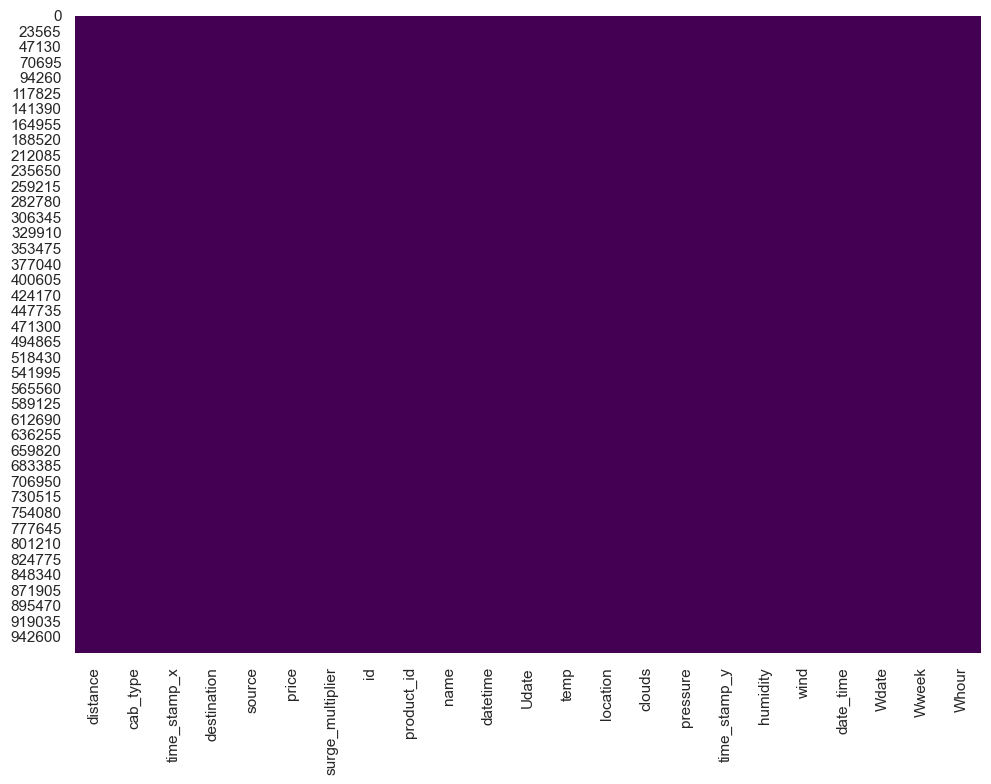

In [28]:
display("Displaying a heatmap of missing values in the UberWeather DataFrame")

# Plot a heatmap where True (missing) and False (present) values are shown by color
sns.heatmap(UberWeather.isnull(), cmap='viridis', cbar=False)

In [29]:
# Replace all missing values in the UberWeather DataFrame with 0 to avoid NaNs during analysis
UberWeather.fillna(0, inplace=True)

'Displaying the count of Uber rides for each surge multiplier value'

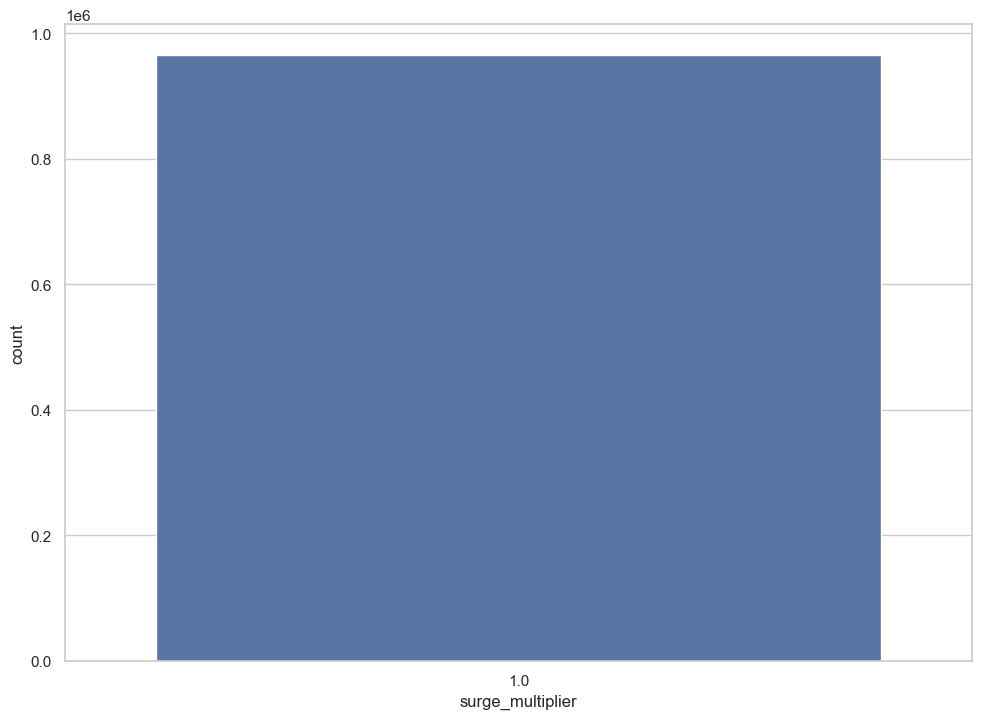

In [30]:
display("Displaying the count of Uber rides for each surge multiplier value")

# Plot a countplot of the 'surge_multiplier' column to show how many rides occurred at each multiplier
ax = sns.countplot(data=UberWeather, x='surge_multiplier')
plt.show()

In [31]:
display("Displaying column names of the UberWeather DataFrame:")
display(UberWeather.columns)

# This shows the list of all column names in the UberWeather DataFrame.

'Displaying column names of the UberWeather DataFrame:'

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [32]:
# Group the UberWeather DataFrame by 'cab_type' and count non-null entries in each group
UberWeather.groupby('cab_type').count()

,distance,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,datetime,...,location,clouds,pressure,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
cab_type,,,,,,,,,,,,,,,,,,,,,
Uber,966161,966161,966161,966161,966161,966161,966161,966161,966161,966161,...,966161,966161,966161,966161,966161,966161,966161,966161,966161,966161


## Explotary Data Analysis with final dataset.

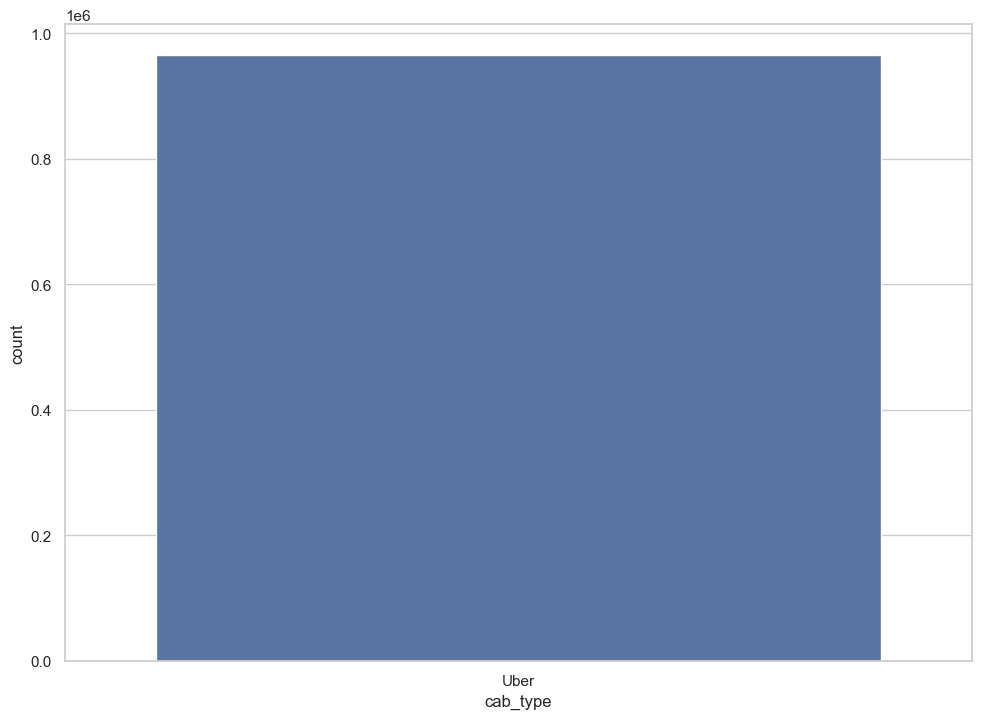

In [33]:
# Plot the count of each cab type in the UberWeather DataFrame
ax = sns.countplot(data=UberWeather, x='cab_type')


'Displaying count of Uber rides by destination'

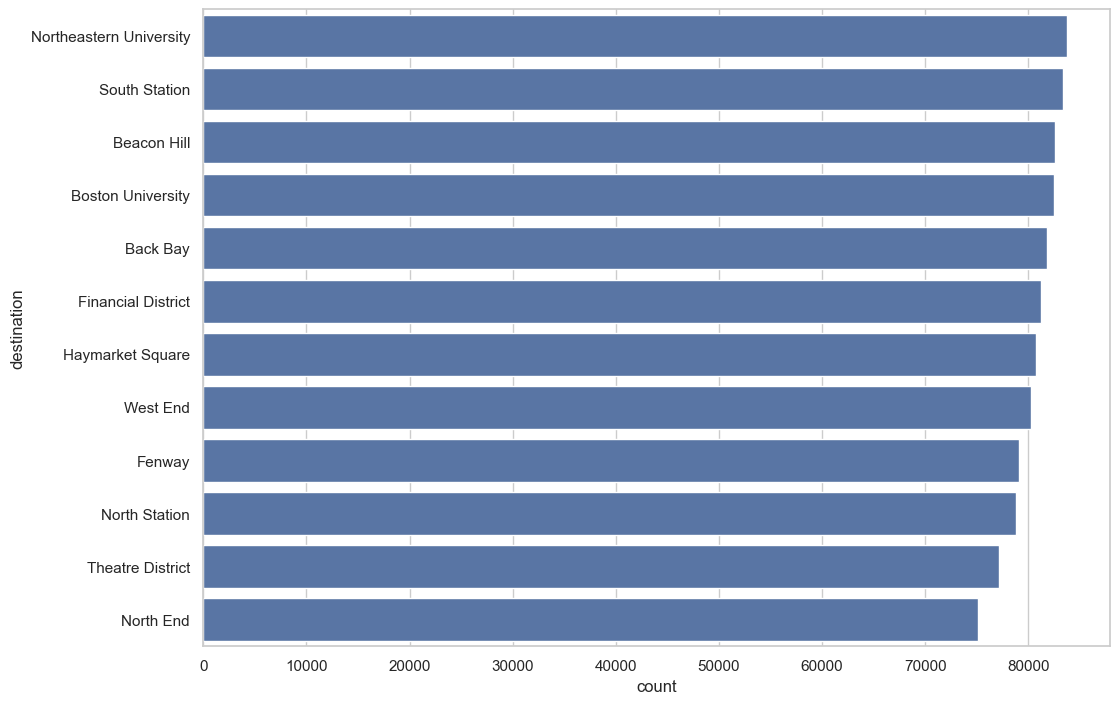

In [34]:
# This plot shows the number of rides for each destination in the dataset.
display("Displaying count of Uber rides by destination")
ax = sns.countplot(data=UberWeather, y='destination', order=UberWeather.destination.value_counts().index)

'Displaying count of Uber rides by source'

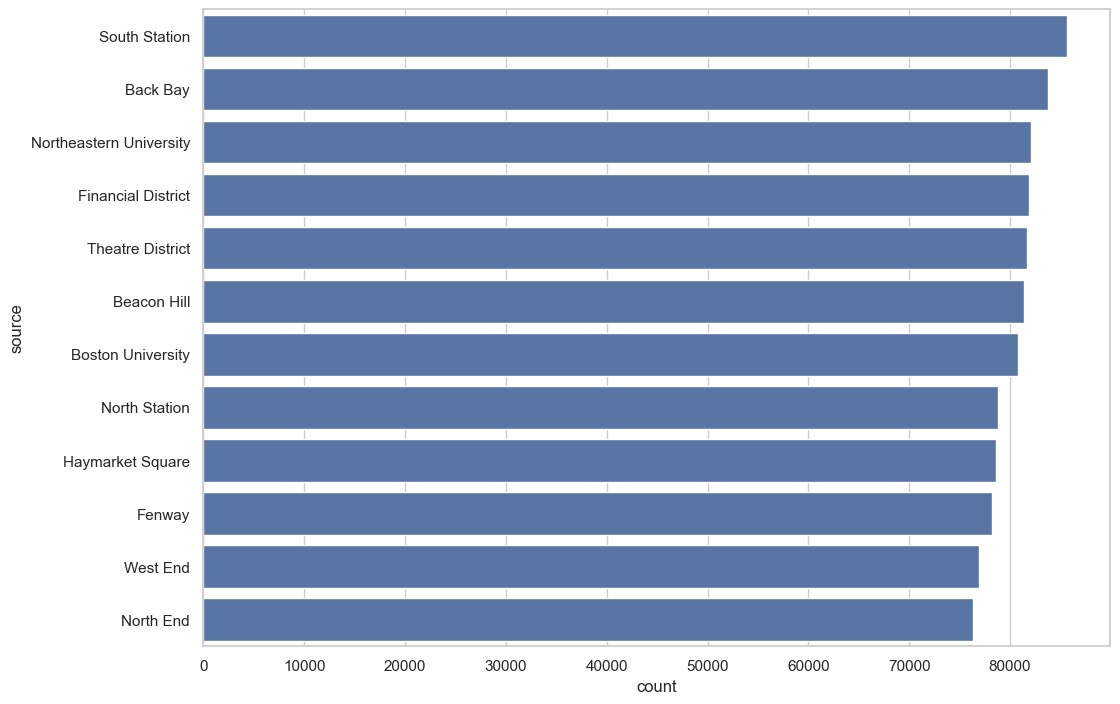

In [35]:

# Plot the number of Uber rides for each pickup source in descending order
display("Displaying count of Uber rides by source")
ax = sns.countplot(data=UberWeather, y='source', order=UberWeather.source.value_counts().index)

'Displaying distribution of Uber ride prices with KDE'

<Figure size 700x700 with 0 Axes>

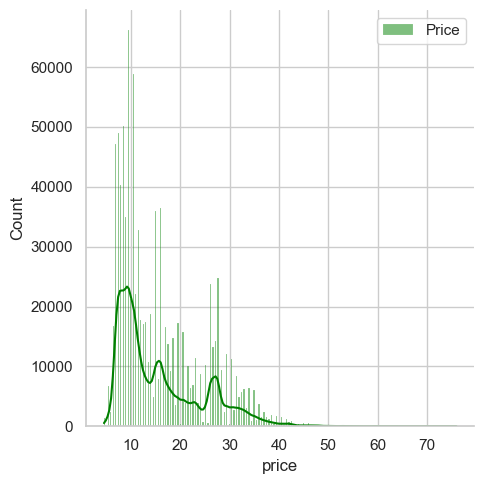

In [36]:

# Plotting the distribution of Uber ride prices with a kernel density estimate
display("Displaying distribution of Uber ride prices with KDE")
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.price, color='green', label='Price', kde=True)
plt.legend()


'Displaying distribution of Uber ride distances with KDE'

<Figure size 700x700 with 0 Axes>

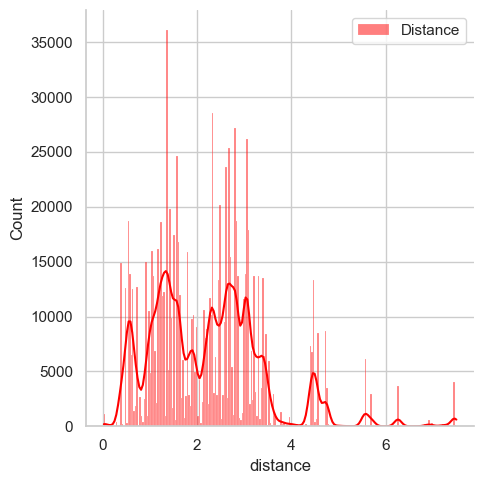

In [37]:
# Plot the distribution of trip distances with a kernel density estimate
display("Displaying distribution of Uber ride distances with KDE")
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.distance, color='red', label='Distance', kde=True)
plt.legend()


'Displaying the distribution of temperature (with KDE)'

<Figure size 700x700 with 0 Axes>

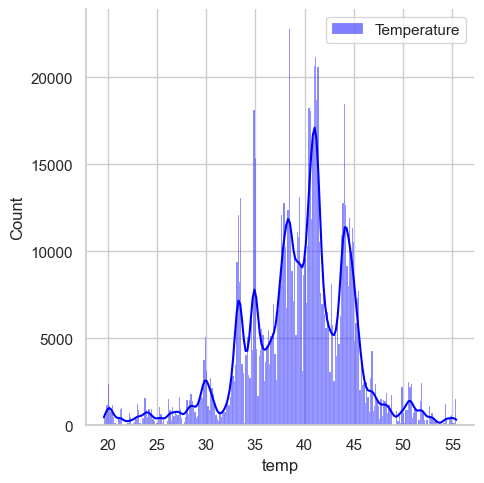

In [38]:
# Plotting the distribution of temperature values with a kernel density estimate
display("Displaying the distribution of temperature (with KDE)")
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.temp, color='blue', label='Temperature', kde=True)
plt.legend()


'Displaying the distribution of cloud coverage (with KDE)'

<Figure size 700x700 with 0 Axes>

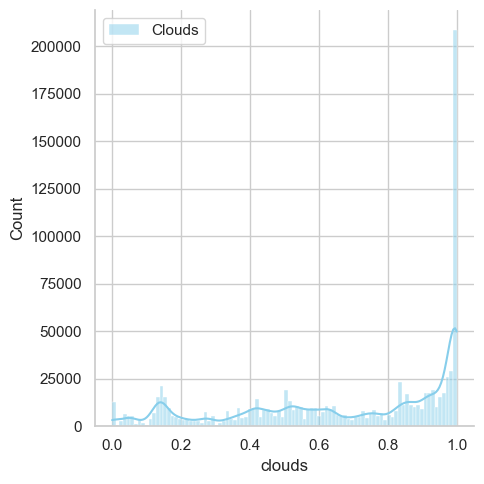

In [39]:
# Plotting the distribution of cloud coverage values with a kernel density estimate
display("Displaying the distribution of cloud coverage (with KDE)")
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.clouds, color='Skyblue',label='Clouds', kde=True)
plt.legend();



'Displaying the distribution of air pressure values with KDE'

<Figure size 700x700 with 0 Axes>

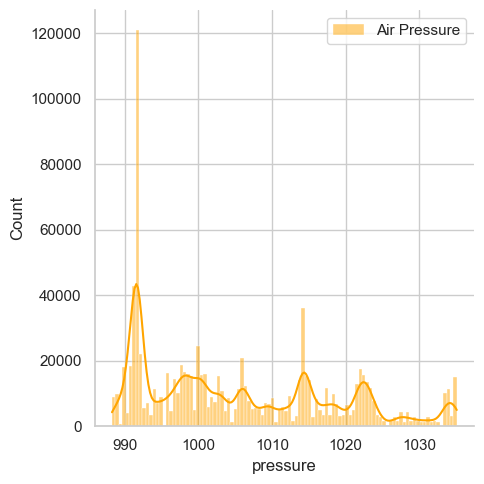

In [40]:
# Plotting the distribution of air pressure values with a kernel density estimate
display("Displaying the distribution of air pressure values with KDE")
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.pressure, color='orange',label='Air Pressure', kde=True)
plt.legend();



'Displaying the distribution of humidity (with KDE)'

<Figure size 700x700 with 0 Axes>

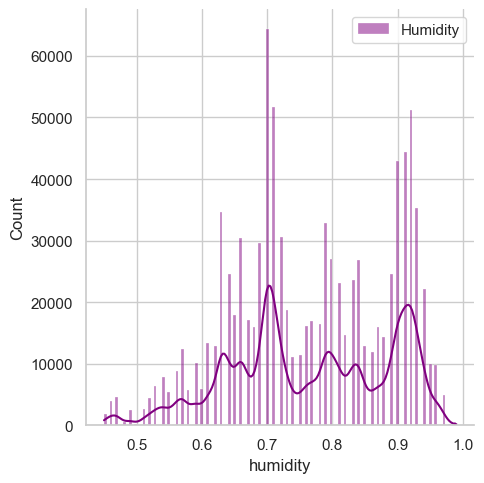

In [41]:
# Plotting the distribution of humidity values with a kernel density estimate
display("Displaying the distribution of humidity (with KDE)")
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.humidity, color='purple', label='Humidity', kde=True)
plt.legend()


'Displaying the distribution of wind (with KDE)'

<Figure size 700x700 with 0 Axes>

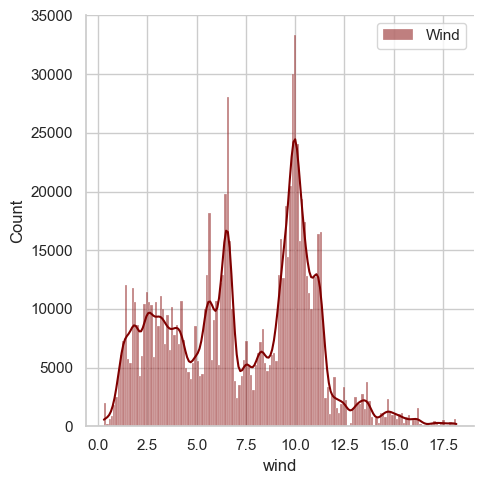

In [42]:
# Plotting the distribution of wind values with a kernel density estimate
display("Displaying the distribution of wind (with KDE)")
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.wind, color='maroon',label='Wind', kde=True)
plt.legend()



'Displaying the distribution of Uber rides by hour'

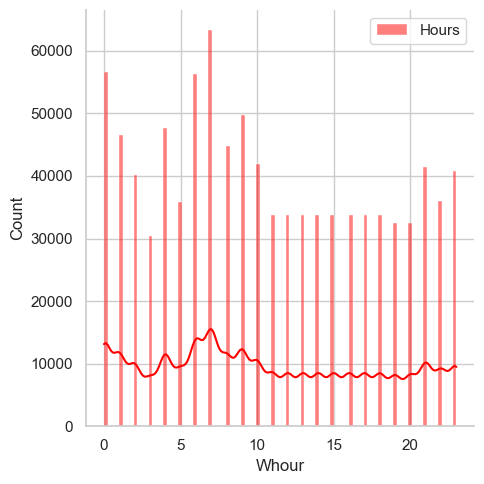

In [43]:
# Plotting the distribution of Uber rides by hour using a KDE plot
display("Displaying the distribution of Uber rides by hour")
#UberWeather['hour'].value_counts().plot(kind='hist',color='orange')

sns.displot(UberWeather.Whour, color='red',label='Hours', kde=True)
plt.legend();


'Displaying distribution of Uber rides by day of the week'

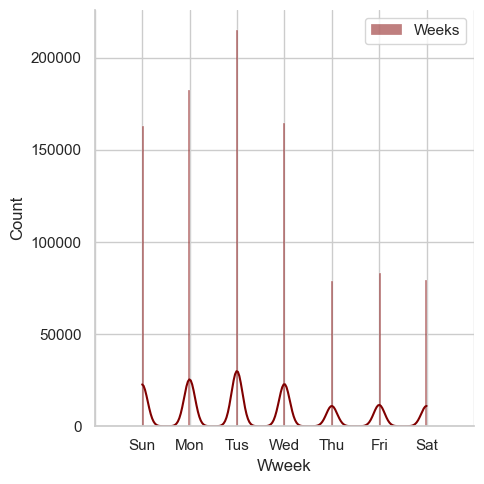

In [44]:
# Display distribution of Uber rides by day of the week
display("Displaying distribution of Uber rides by day of the week")
s = sns.displot(UberWeather.Wweek, color='maroon',label='Weeks', kde=True) 
s.set_xticklabels(['','Sun','Mon','Tus','Wed','Thu','Fri','Sat',''])

plt.legend();



'Displaying scatter plot of price vs. hour of the day'

<Axes: xlabel='Whour', ylabel='price'>

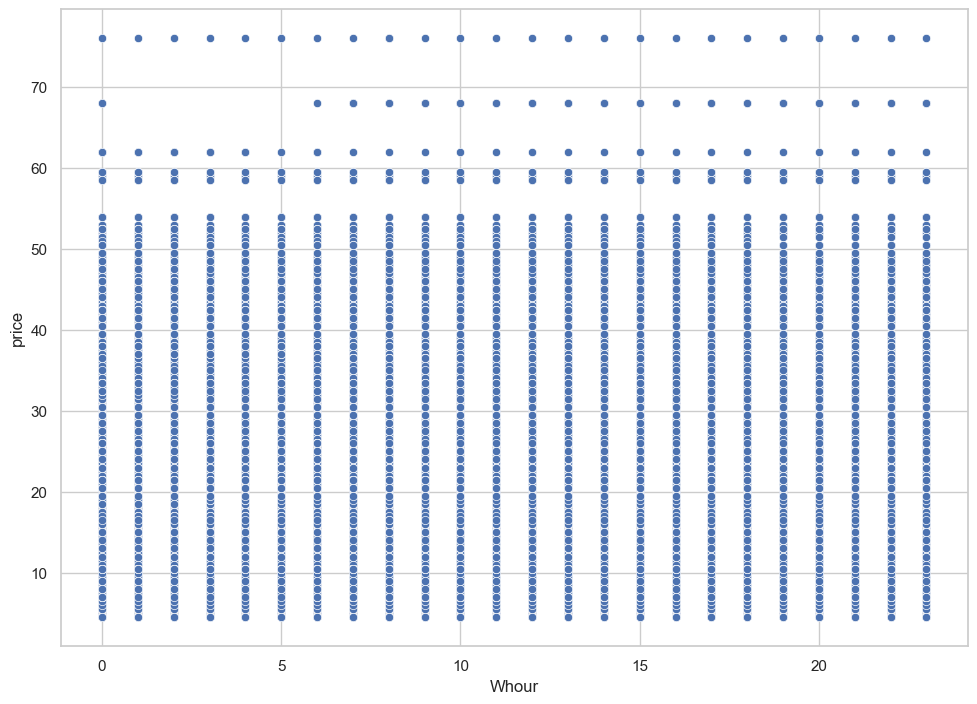

In [45]:
# Scatter plot showing how Uber ride prices vary by hour of the day
display("Displaying scatter plot of price vs. hour of the day")
sns.scatterplot(data=UberWeather, x="Whour", y="price")

'Displaying scatter plot of price vs. day of the week'

<Axes: xlabel='Wweek', ylabel='price'>

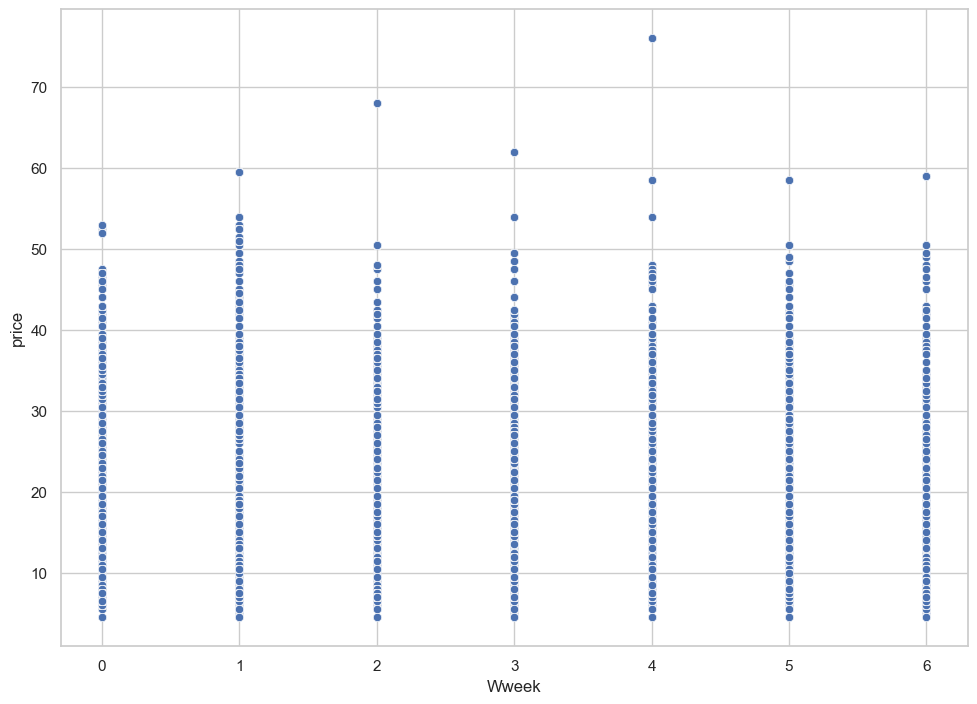

In [46]:
# Scatter plot showing how Uber ride prices vary by day of the week
display("Displaying scatter plot of price vs. day of the week")
sns.scatterplot(data=UberWeather, x="Wweek", y="price")



'Displaying scatter plot of price vs. trip distance'

<Axes: xlabel='distance', ylabel='price'>

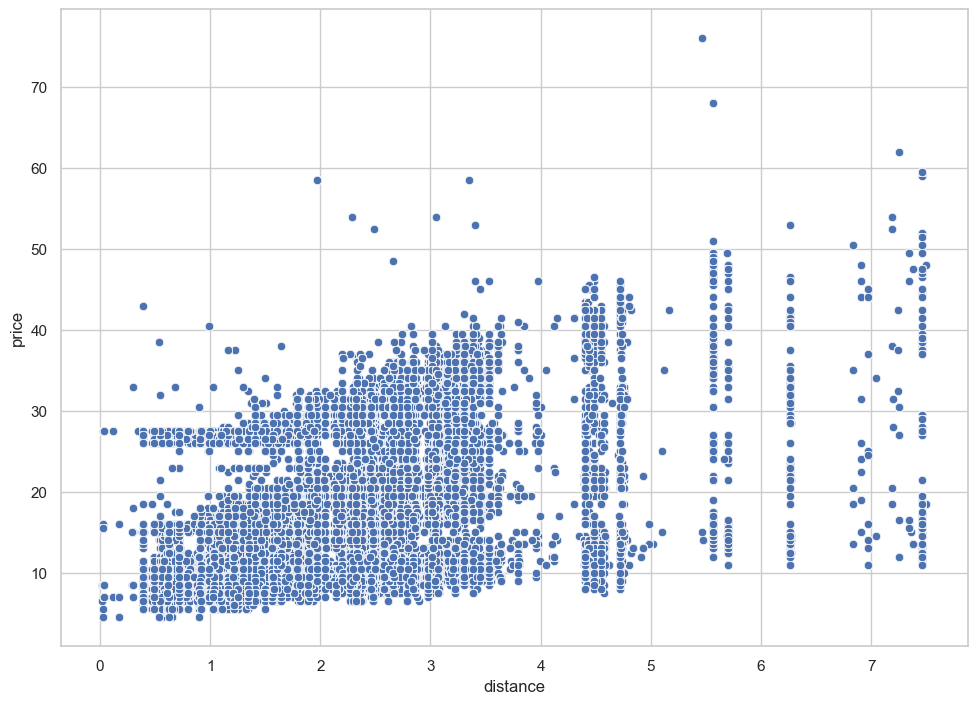

In [47]:
# Scatter plot showing the relationship between trip distance and price
display("Displaying scatter plot of price vs. trip distance")
sns.scatterplot(data=UberWeather, x="distance", y="price")



'Displaying scatter plot of ride price vs. temperature'

<Axes: xlabel='temp', ylabel='price'>

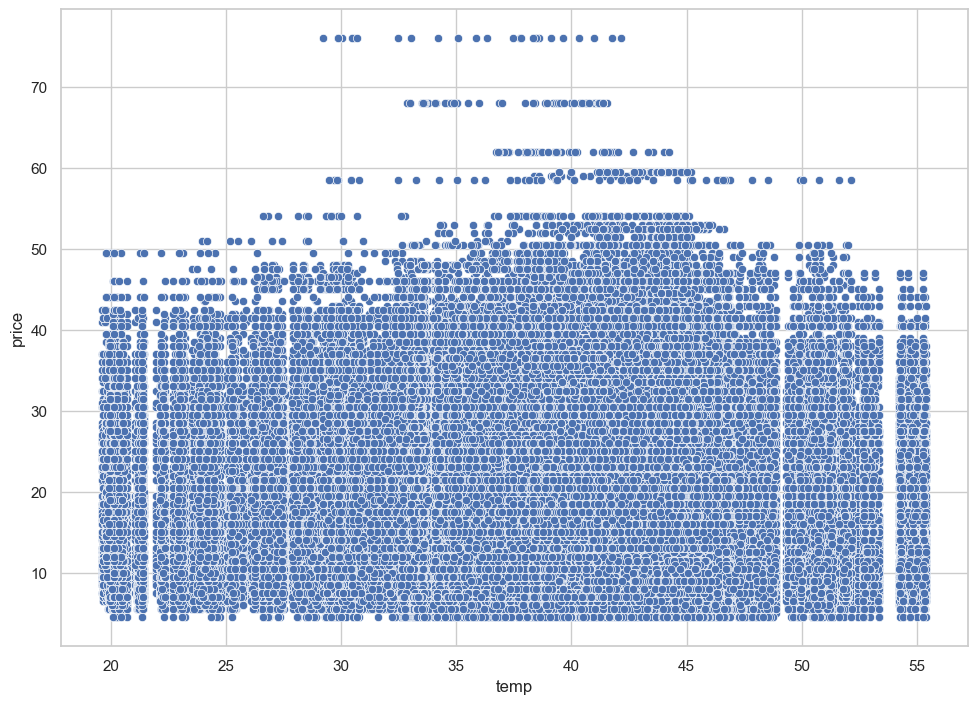

In [48]:
# Plot the relationship between temperature and Uber ride price
display("Displaying scatter plot of ride price vs. temperature")
sns.scatterplot(data=UberWeather, x="temp", y="price")



'Displaying scatter plot of price vs. cloud coverage'

<Axes: xlabel='clouds', ylabel='price'>

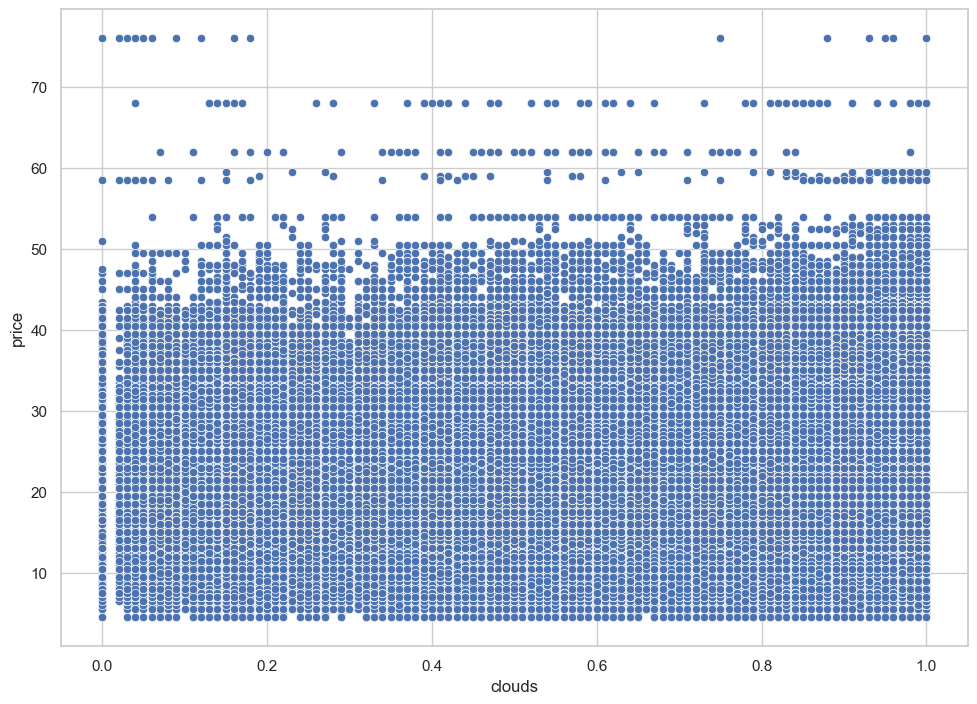

In [49]:
# Scatter plot showing the relationship between cloud coverage and Uber ride price
display("Displaying scatter plot of price vs. cloud coverage")
sns.scatterplot(data=UberWeather, x="clouds", y="price")



'Displaying scatter plot of price vs. pressure'

<Axes: xlabel='pressure', ylabel='price'>

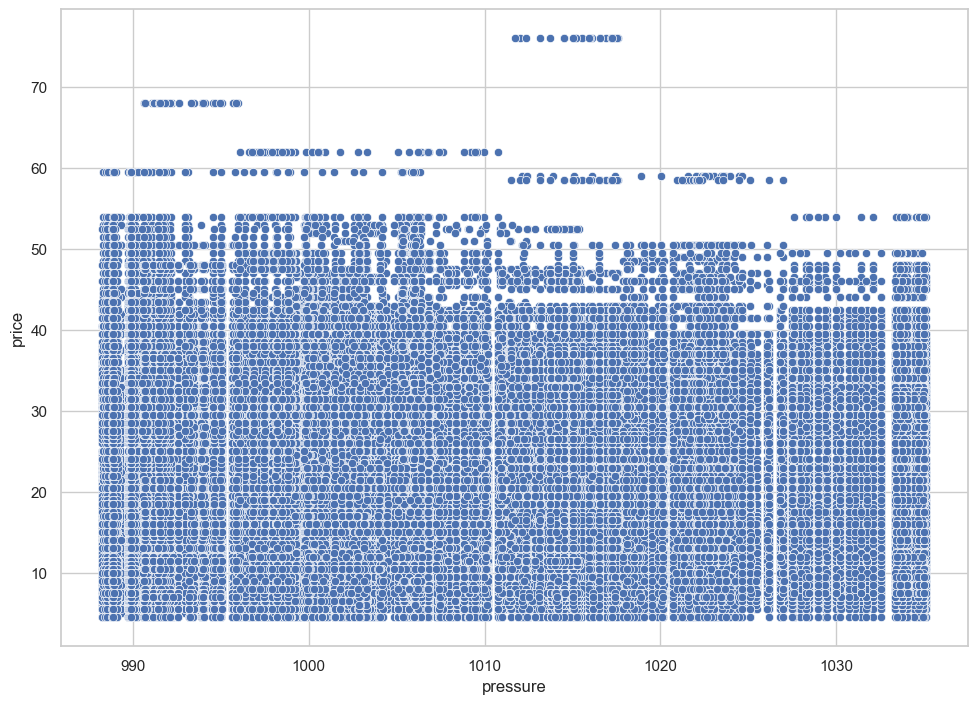

In [50]:
# Scatter plot showing the relationship between atmospheric pressure and Uber ride price
display("Displaying scatter plot of price vs. pressure")
sns.scatterplot(data=UberWeather, x="pressure", y="price")



'Displaying scatter plot of humidity vs price'

<Axes: xlabel='humidity', ylabel='price'>

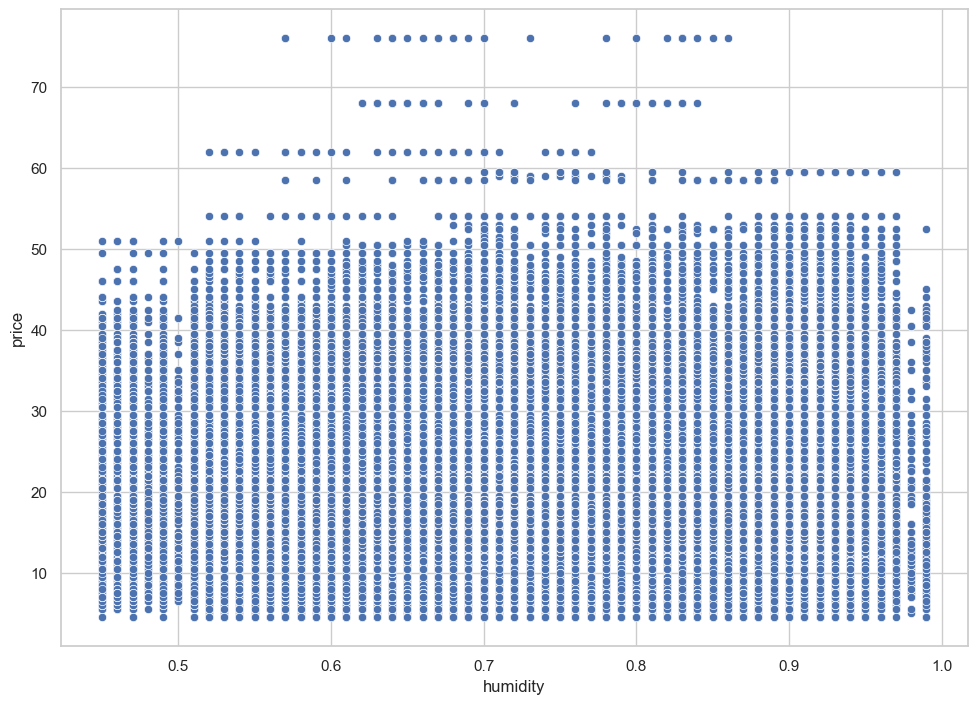

In [51]:
# Plotting the relationship between humidity and Uber ride price
display("Displaying scatter plot of humidity vs price")
sns.scatterplot(data=UberWeather, x="humidity", y="price")



'Displaying scatter plot of wind vs. price'

<Axes: xlabel='wind', ylabel='price'>

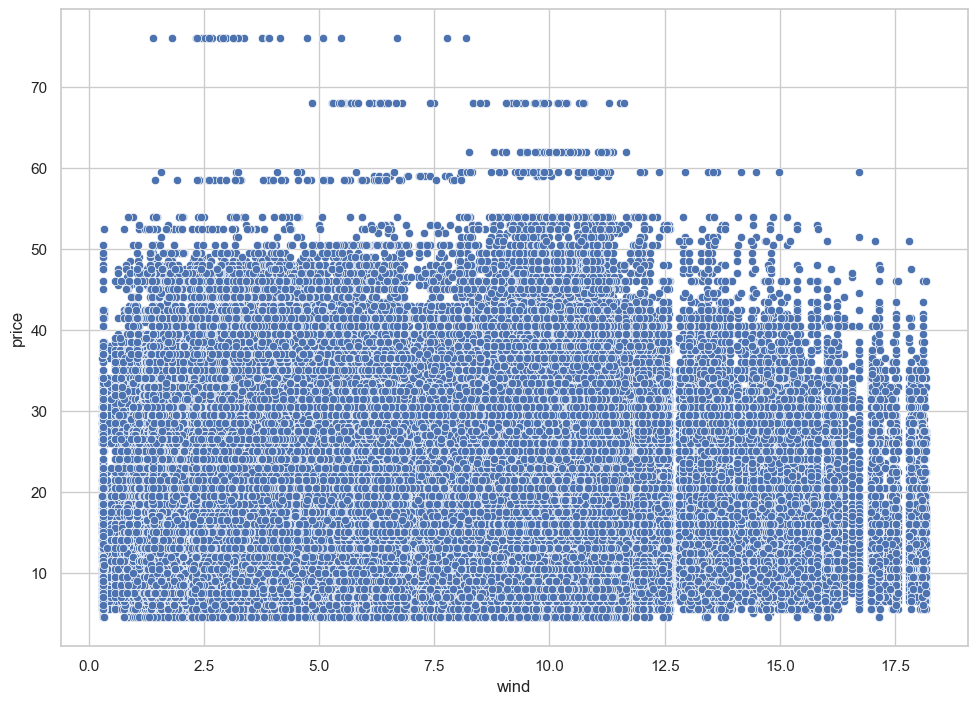

In [52]:
# Scatter plot showing how wind speed relates to Uber ride prices
display("Displaying scatter plot of wind vs. price")
sns.scatterplot(data=UberWeather, x="wind", y="price")


'Displaying heatmap of descriptive statistics for selected variables'

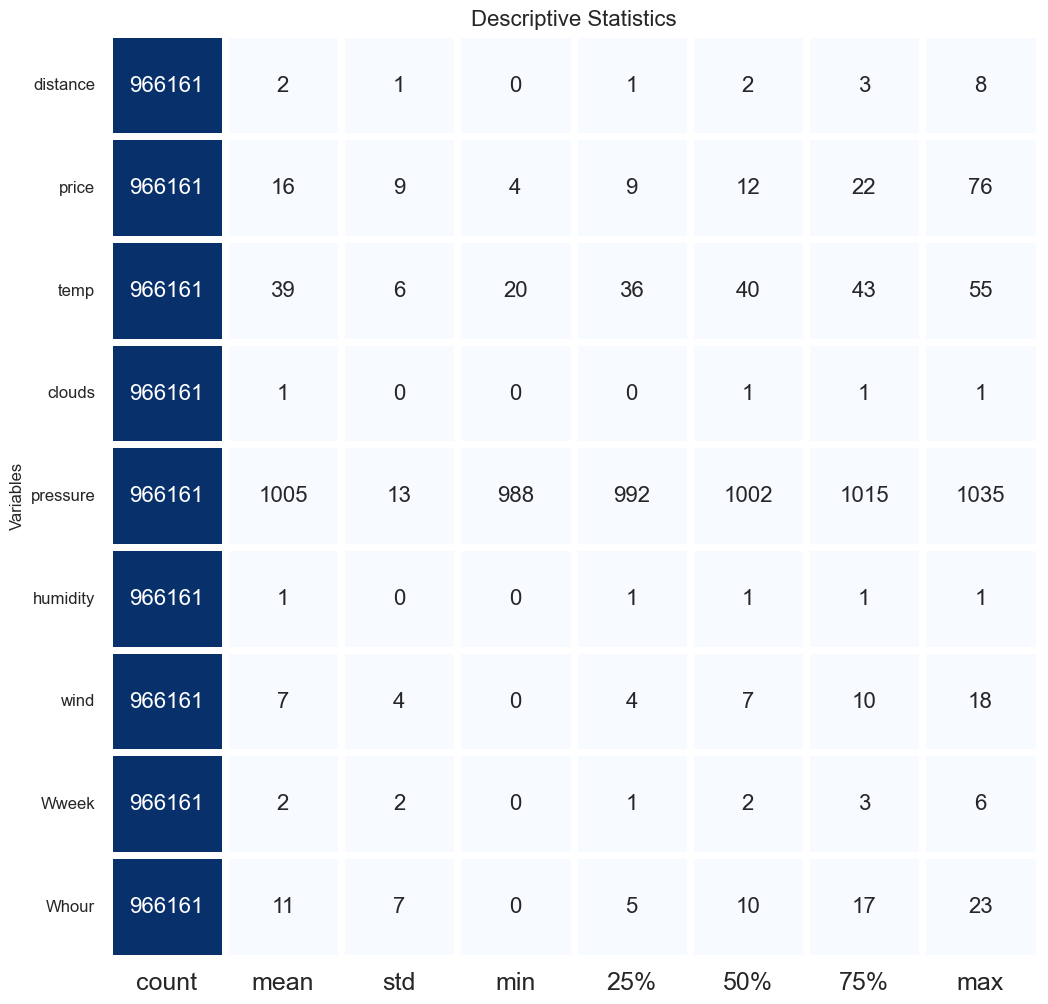

In [53]:
# Creating a heatmap to visualize descriptive statistics of selected variables in the UberWeather dataset
display("Displaying heatmap of descriptive statistics for selected variables")

# compute descriptive stats and select only numeric ones of interest
desc = UberWeather.describe().T
vars_to_plot = ['distance', 'price', 'temp', 'clouds', 'pressure', 'humidity', 'wind', 'Wweek', 'Whour']
# slice and ensure float dtype
df1 = desc.loc[vars_to_plot, ["count","mean","std","min","25%","50%","75%","max"]].astype(float)

f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True, cmap="Blues", fmt='.0f',
            ax=ax, linewidths=5, cbar=False,
            annot_kws={"size":16})

plt.xticks(size=18)
plt.yticks(size=12, rotation=0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size=16)
plt.show()

## Feature Engineering

In [54]:
# Display the column names of the UberWeather DataFrame
display("Displaying column names of the UberWeather DataFrame:")

display(UberWeather.columns)

'Displaying column names of the UberWeather DataFrame:'

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [55]:

# Drop columns with constant or unique values that aren't useful for modeling
# Here we remove unwanted columns for modeling. We remove columns which have all values repeated and columns which have all distinct values.
display("Unwanted columns dropped, dataset ready for modeling")
UberMod = UberWeather.drop(['cab_type','time_stamp_x','id','product_id','datetime','Udate','time_stamp_y','date_time'], axis=1)
display(UberMod)

'Unwanted columns dropped, dataset ready for modeling'

,distance,destination,source,price,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wdate,Wweek,Whour
0,0.55,South Station,Theatre District,27.5,1.0,Black SUV,45.89,South Station,0.04,1003.20,0.60,7.75,2018-12-04,1,1
1,0.55,South Station,Theatre District,27.5,1.0,Black SUV,45.07,South Station,0.25,1003.17,0.62,8.44,2018-12-04,1,2
2,0.55,South Station,Theatre District,27.5,1.0,Black SUV,39.87,South Station,0.56,1004.45,0.64,8.21,2018-12-04,1,5
3,0.55,South Station,Theatre District,27.5,1.0,Black SUV,44.03,South Station,0.53,1003.15,0.62,7.36,2018-12-04,1,3
4,0.55,South Station,Theatre District,27.5,1.0,Black SUV,41.85,South Station,0.52,1003.93,0.63,8.05,2018-12-04,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966156,2.72,West End,Fenway,10.5,1.0,WAV,52.68,West End,0.74,999.95,0.86,6.62,2018-12-03,0,14
966157,2.72,West End,Fenway,10.5,1.0,WAV,55.29,West End,0.48,999.24,0.68,16.27,2018-12-03,0,16
966158,2.72,West End,Fenway,10.5,1.0,WAV,47.99,West End,0.18,1001.44,0.55,10.59,2018-12-03,0,22
966159,2.72,West End,Fenway,10.5,1.0,WAV,46.70,West End,0.94,1002.28,0.93,2.91,2018-12-03,0,3


In [56]:
# Encoding categorical columns into numeric values for better model processing
display("Encoding categorical data into numeric values for modeling...")

le = LabelEncoder()
UberMod.destination = le.fit_transform(UberMod.destination)

UberMod.source = le.fit_transform(UberMod.source)

UberMod.name = le.fit_transform(UberMod.name)

UberMod.location = le.fit_transform(UberMod.location)

UberMod.Wdate = le.fit_transform(UberMod.Wdate)

UberMod.price = le.fit_transform(UberMod.price)

'Encoding categorical data into numeric values for modeling...'

In [57]:
display(UberMod)

,distance,destination,source,price,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wdate,Wweek,Whour
0,0.55,9,10,46,1.0,1,45.89,9,0.04,1003.20,0.60,7.75,8,1,1
1,0.55,9,10,46,1.0,1,45.07,9,0.25,1003.17,0.62,8.44,8,1,2
2,0.55,9,10,46,1.0,1,39.87,9,0.56,1004.45,0.64,8.21,8,1,5
3,0.55,9,10,46,1.0,1,44.03,9,0.53,1003.15,0.62,7.36,8,1,3
4,0.55,9,10,46,1.0,1,41.85,9,0.52,1003.93,0.63,8.05,8,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966156,2.72,11,3,12,1.0,5,52.68,11,0.74,999.95,0.86,6.62,7,0,14
966157,2.72,11,3,12,1.0,5,55.29,11,0.48,999.24,0.68,16.27,7,0,16
966158,2.72,11,3,12,1.0,5,47.99,11,0.18,1001.44,0.55,10.59,7,0,22
966159,2.72,11,3,12,1.0,5,46.70,11,0.94,1002.28,0.93,2.91,7,0,3


## Model Building

Here we begin with our modelling. We seperate the dependent variable from the independent ones. 


In [58]:
# Splitting UberMod into predictors (X) and response variable (Y)
# X holds all columns except 'price'; Y is the 'price' column
display(f"Features (X) and target (Y) defined. X shape: {UberMod.drop('price', axis=1).shape}, Y shape: {UberMod['price'].shape}")
X = UberMod.drop('price',axis=1)
Y = UberMod['price']



#X=UberWeather[['distance','temp','clouds','humidity','pressure','day','hour','rain', 'surge_multiplier']]
#Y=UberWeather['price']

'Features (X) and target (Y) defined. X shape: (966161, 14), Y shape: (966161,)'

#### One seperation is done we split the data for treaning and testing. We used the traditional ratio 70:30 for our train and test Respectively.


In [59]:
# Splitting the dataset into training and testing sets with a 70:30 ratio
# Random state ensures reproducibility of the split
display("Splitting data into training and testing sets...")
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state=12345)

'Splitting data into training and testing sets...'

In [60]:
# Display the shapes of the main feature DataFrame and its train/test splits for verification
display("DataFrame and train/test split shapes:")
display('DataFrame Shape:', UberMod.shape)
display('*'*25)
display('X Train Shape:', X_train.shape)
display('*'*25)
display('X Test Shape:', X_test.shape)
display('*'*25)
display('Y Train Shape:', y_train.shape)
display('*'*25)
display('Y Test Shape:', y_test.shape)

'DataFrame and train/test split shapes:'

'DataFrame Shape:'

(966161, 15)

'*************************'

'X Train Shape:'

(647327, 14)

'*************************'

'X Test Shape:'

(318834, 14)

'*************************'

'Y Train Shape:'

(647327,)

'*************************'

'Y Test Shape:'

(318834,)

There are several algorithmns we will use LinearRegression as its best and fastest with satisfactory results.


In [61]:
# Instantiate the Linear Regression model and fit it to the training data
display("Training Linear Regression model on X_train and y_train...")
model = LinearRegression()
model.fit(X_train, y_train)


'Training Linear Regression model on X_train and y_train...'

LinearRegression()

In [62]:
# Generate predictions on the test set using the trained model
display("Predicted price values for X_test:")
pred=model.predict(X_test)
display(pred)

'Predicted price values for X_test:'

array([ 2.144221  , 26.35982846, 11.7279601 , ..., 17.42583773,
       15.70319537, 37.98432719], shape=(318834,))

In [63]:
# Create a DataFrame to compare true test values with model predictions
# and inform the user what is being displayed
display("Displaying comparison of actual vs. predicted ride prices:")
data=pd.DataFrame({'Actual Data': y_test, 'Prediction Data': pred})

'Displaying comparison of actual vs. predicted ride prices:'

'Displaying bar plot of the first 25 rows of the DataFrame:'

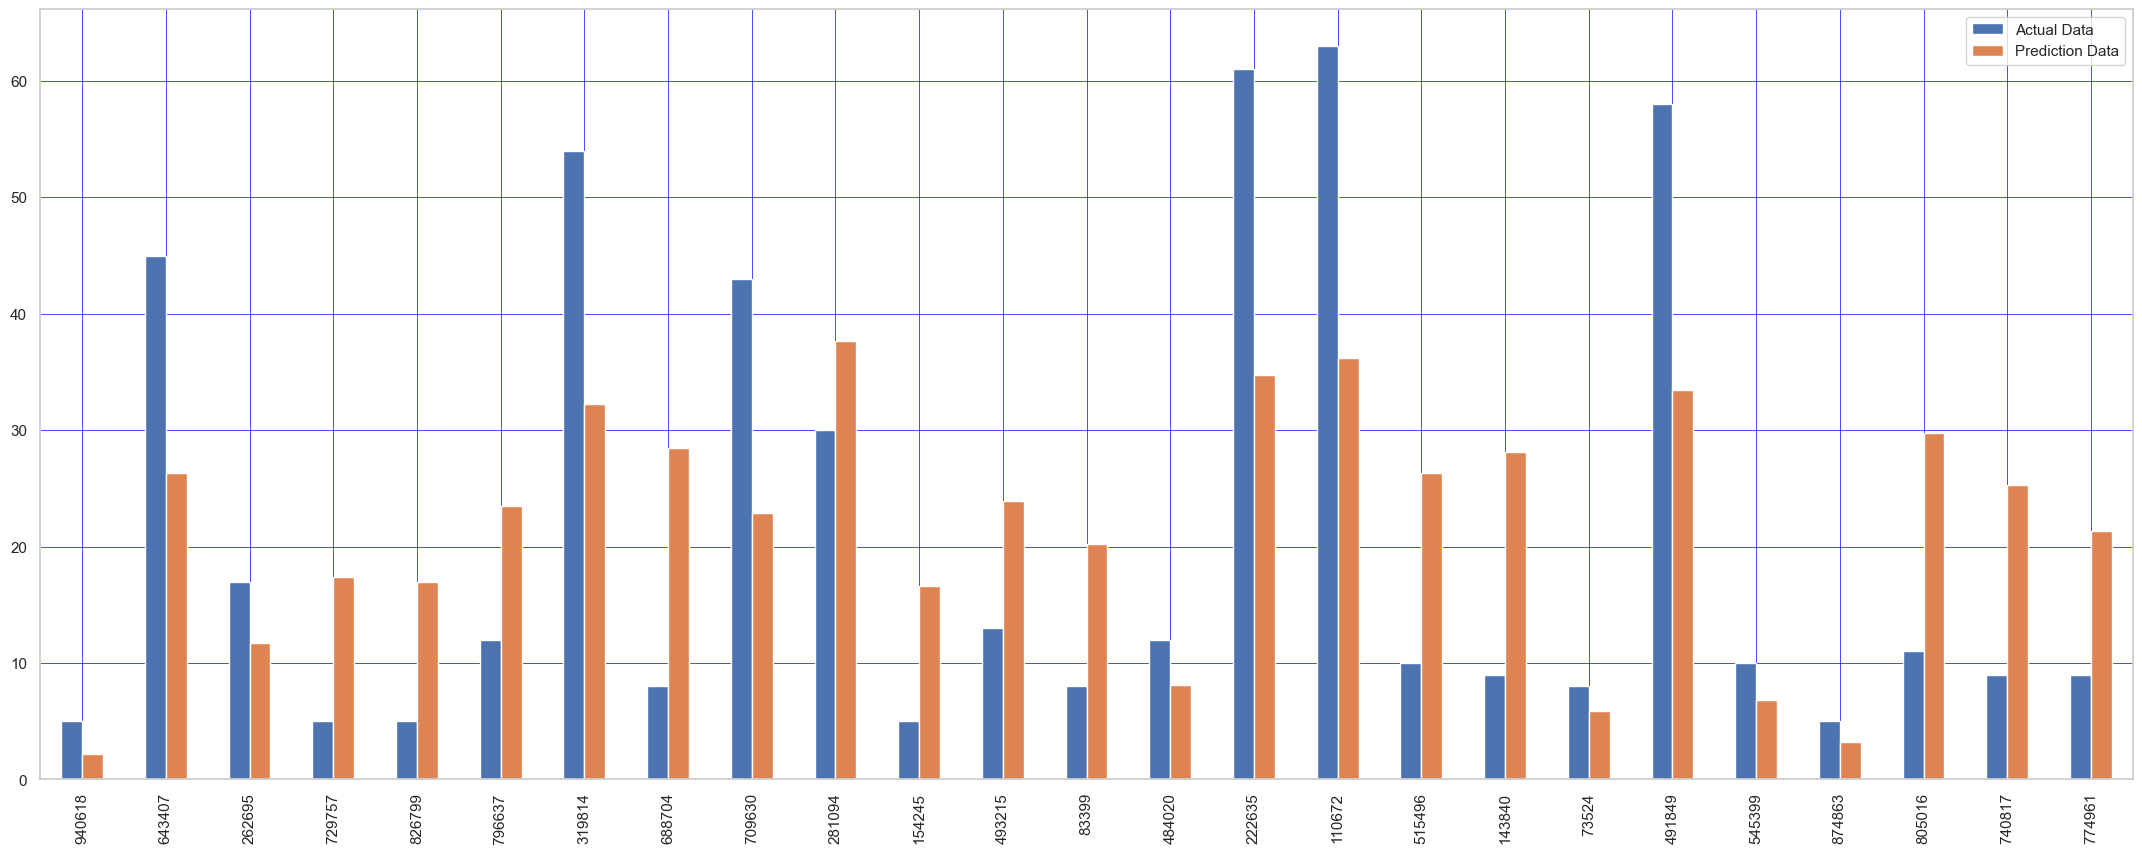

In [64]:
# Displaying the first 25 rows of the DataFrame as a bar plot with grid lines for better visualization
display("Displaying bar plot of the first 25 rows of the DataFrame:")
data1=data.head(25)
data1.plot(kind='bar',figsize=(27,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [65]:
# Perform 5-fold cross-validation on the training data to assess the Linear Regression model’s performance
display("N-fold cross-validation scores and their mean for Linear Regression:")

# instantiate the model
reg = LinearRegression()

# call cross_val_score
cv_results = cross_val_score(reg, X_train, y_train, cv=5)

display(f'Scores: {np.round(cv_results, 3)}')
display(f'Scores mean: {np.round(np.mean(cv_results), 3)}')

'N-fold cross-validation scores and their mean for Linear Regression:'

'Scores: [0.423 0.424 0.424 0.426 0.424]'

'Scores mean: 0.424'

In [66]:
def GetModels():
    # This function initializes and returns a list of different classification models for comparison.
    display("List of initialized classification models:")
    models = []
    models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,
                                             objective='binary:logistic',
                                             random_state=0,eval_metric='mlogloss')])
    models.append(['Logistic Regression',LogisticRegression(random_state=0)])
    models.append(['SVM',SVC(random_state=0)])
    models.append(['KNeigbors',KNeighborsClassifier()])
    models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
    models.append(['RandomForest',RandomForestClassifier(random_state=0)])
    models.append(['AdaBoostClassifier',AdaBoostClassifier()])
    return models

## Checking Error

In [67]:
# Compute the Root Mean Absolute Error to evaluate how far off the predictions are on average
display("Root Mean Absolute Error of the model predictions:")
error = np.sqrt(metrics.mean_absolute_error(y_test, pred))
display(error)

'Root Mean Absolute Error of the model predictions:'

np.float64(3.271470654854909)

## Regularized regression

### Ridge Regression


In [68]:
# Applying Ridge Regression (L2 regularization) to train the model and control overfitting
# The model is fitted on X_train/y_train and then evaluated on X_test/y_test
display("Ridge Regression model performance (R² score):")


# instantiate the model
ridge = Ridge(alpha=0.1)

# fit the model
ridge.fit(X_train, y_train)

# predict on the test data
ridge_pred = ridge.predict(X_test)

# get the score
rs = ridge.score(X_test, y_test)

display(f'Ridge Score: {round(rs, 4)}')

'Ridge Regression model performance (R² score):'

'Ridge Score: 0.4212'

###  Lasso Regression


In [69]:
# Compute and display the R² score for the Lasso Regression model
display("Lasso Regression model performance (R² score):")


# instantiate the regressor
lasso = Lasso(alpha=0.1)

# fit the model
lasso.fit(X_train, y_train)

# predict on the test data
lasso_pred = lasso.predict(X_test)

# get the score
ls = lasso.score(X_test, y_test)

display(f'Ridge Score: {round(ls, 4)}')

'Lasso Regression model performance (R² score):'

'Ridge Score: 0.4212'

'Lasso feature coefficients to identify important predictors'

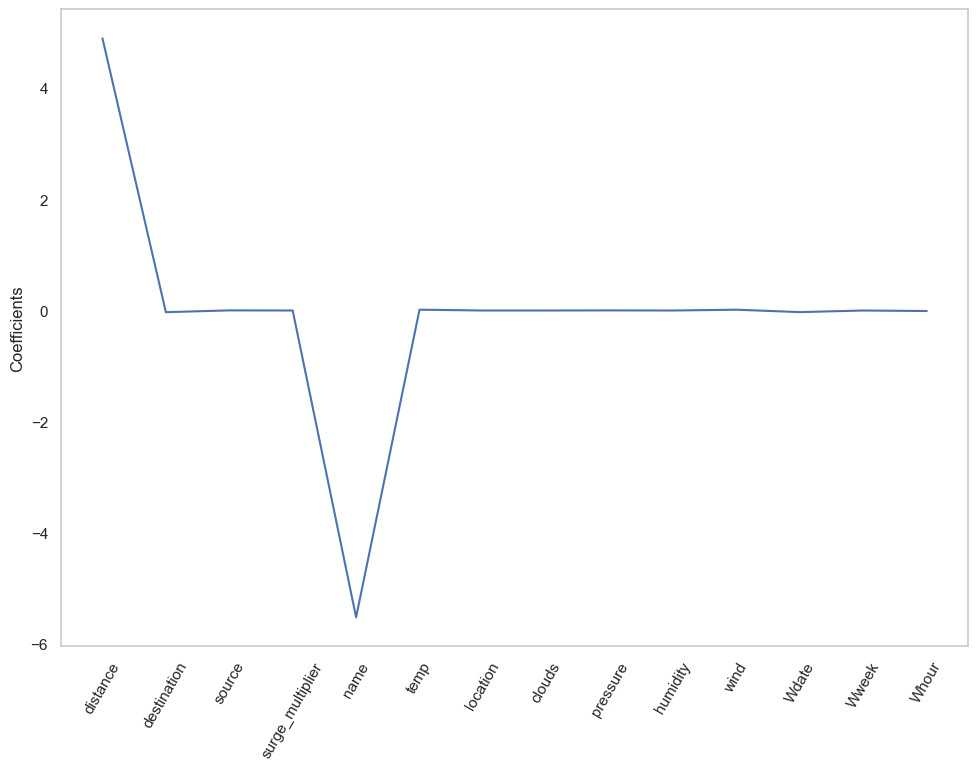

In [70]:
# Fit Lasso regression on the full dataset to compute feature coefficients for feature selection
display("Lasso feature coefficients to identify important predictors")


# store the feature names
names = X_train.columns

# instantiate the regressor
lasso = Lasso(alpha=0.1)

# extract and store the coef attribute
lasso_coef = lasso.fit(X, Y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.grid()
plt.show()

In [71]:
# This function visualizes the mean cross-validation scores and their standard error over a range of α values
display("Displaying cross-validation scores ± standard error for each alpha on a log scale")
def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores, label='CV Scores')

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, color='violet', alpha=0.2, label='CV Score ± std error')
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5', label='Max CV Score')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

'Displaying cross-validation scores ± standard error for each alpha on a log scale'

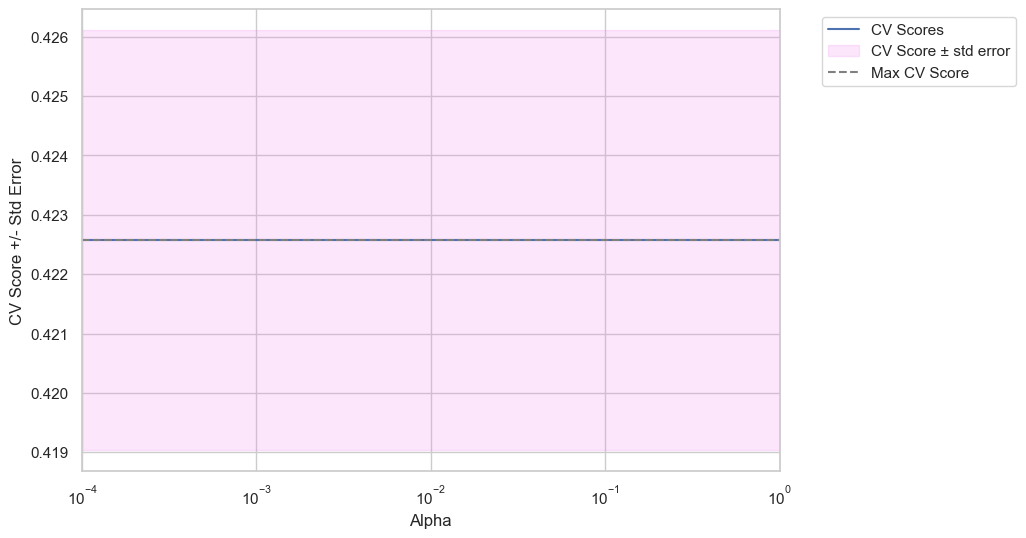

In [72]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge()

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, Y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std, alpha_space)

## Fine-tuning the model

In [73]:
# Fit the K-Nearest Neighbors classifier on the training data and predict labels for the test set
display("Confusion matrix and classification report for the KNN model:")
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=8)


# fit the training data
knn.fit(X_train, y_train)

# predict the labels fo the test set
y_pred = knn.predict(X_test)

# confusion_matrix
display(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

# classification report
display(f'Classification Report: \n{classification_report(y_test, y_pred)}')

'Confusion matrix and classification report for the KNN model:'

'Confusion Matrix:\n[[275   0  39 ...   0   0   0]\n [ 29   0   5 ...   0   0   0]\n [113   4 912 ...   0   0   0]\n ...\n [  0   0   0 ...  19   0   0]\n [  0   0   0 ...   0   1   0]\n [  0   0   0 ...   0   0   0]]\n'

'Classification Report: \n              precision    recall  f1-score   support\n\n           0       0.34      0.64      0.45       429\n           1       0.00      0.00      0.00        78\n           2       0.31      0.39      0.35      2313\n           3       0.10      0.07      0.08       792\n           4       0.21      0.27      0.23      5549\n           5       0.38      0.57      0.46     15521\n           6       0.26      0.37      0.31     16199\n           7       0.20      0.24      0.22     13349\n           8       0.23      0.29      0.26     16628\n           9       0.23      0.27      0.25     11566\n          10       0.30      0.39      0.34     21988\n          11       0.25      0.29      0.27      7071\n          12       0.31      0.39      0.34     19326\n          13       0.26      0.19      0.22      7416\n          14       0.23      0.18      0.20     10727\n          15       0.20      0.13      0.16      5845\n          16       0.22      0.17    

## Saving Model

In [74]:
# Save the trained LinearRegression model to a Joblib file for later reuse
display("Serializing and saving trained model to 'UberP.joblib'...")
from joblib import dump, load
dump(model, 'UberP.joblib') 

"Serializing and saving trained model to 'UberP.joblib'..."

['UberP.joblib']